# SuperStore veri analizi

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


<ipython-input-13-2759698621>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


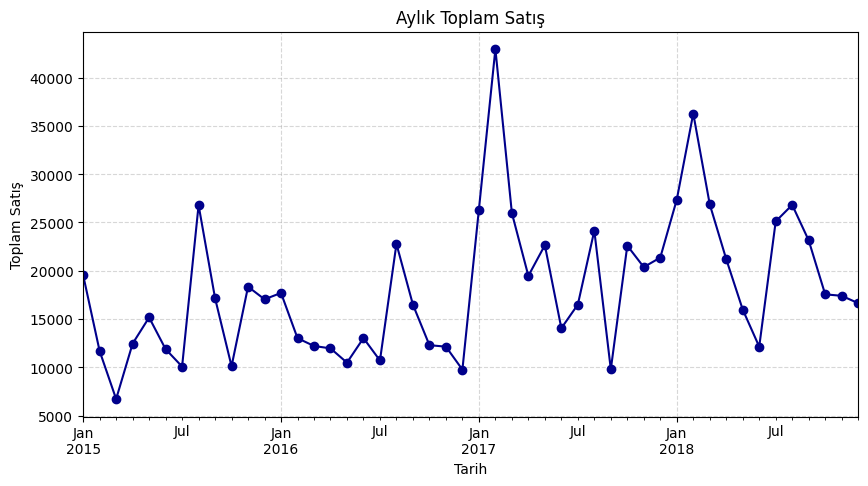

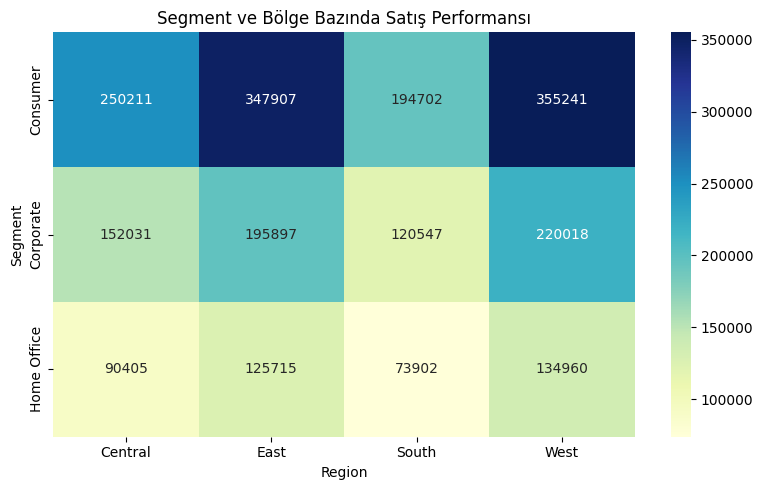

Toplam Satış: $2261536.78
Toplam Sipariş: 4922
Ortalama Sipariş Tutarı: $459.48
Toplam Müşteri Sayısı: 793
Ortalama Teslimat Süresi: 107.01


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')

# Aylık Toplam Satış
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color='darkblue')
plt.title('Aylık Toplam Satış')
plt.xlabel('Tarih')
plt.ylabel('Toplam Satış')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout
plt.show()

# Segment ve Bölge Bazında Satış Performansı
pivot_data = df.pivot_table(values='Sales', index='Segment', columns='Region', aggfunc='sum')

plt.figure(figsize=(8,5))
sns.heatmap(pivot_data, annot=True, fmt='.0f' ,cmap='YlGnBu')
plt.title('Segment ve Bölge Bazında Satış Performansı')
plt.tight_layout()
plt.show()

# Basit KPI raporu
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Delivery Days'] = (df['Ship Date'] - df['Order Date']).dt.days

total_sales= df['Sales'].sum()
total_orders = df['Order ID'].nunique()
avg_order_value = total_sales / total_orders
total_customers = df['Customer ID'].nunique()
avg_delivery = df['Delivery Days'].mean()

print(f"Toplam Satış: ${total_sales:.2f}")
print(f"Toplam Sipariş: {total_orders}")
print(f"Ortalama Sipariş Tutarı: ${avg_order_value:.2f}")
print(f"Toplam Müşteri Sayısı: {total_customers}")
print(f"Ortalama Teslimat Süresi: {avg_delivery:.2f}")
